# Hardware Sales Data Analysis
## Overview
This project analyzes hardware sales data to uncover key insights about suppliers, inventory, sales, pricing, and product demand trends. Various visualizations and statistical techniques were employed to explore relationships in the dataset and gain a comprehensive understanding of market dynamics.

## Dataset
Source: hardwaredata.csv from kaggle.
Description: The dataset contains information about suppliers, products, sales, pricing, inventory, demand ("Fast Moving"), ratings, and other relevant attributes.

Preprocessing: Missing values were removed, and categorical values for "Fast Moving" were converted to binary (Y → 1, N → -1).

## Methodology
Outlier Removal:
Calculated Interquartile Range (IQR) to identify and filter extreme values based on a threshold of 5 × IQR. This ensured cleaner and more reliable data for analysis.

Visualizations:
A variety of plots (pie charts, bar charts, box plots, scatter plots, heatmaps, and violin plots) were used to explore and present the relationships in the data.

Key libraries: Matplotlib, Seaborn, and Pandas.

## Results
The analysis revealed that Supplier A holds the largest market share and inventory size, while Supplier B outpaces others in sales volume despite its smaller market share, indicating effective pricing or product strategy. Most products are priced in the $1-$5 range, with a noticeable negative correlation between price and sales. Screws emerged as the highest-selling product, while flashlights showed the weakest performance. Scatter plots highlighted a trend where inventory size decreases as product prices increase, reflecting suppliers' inventory management strategies.

Ratings analysis showed a median score of around 4, with Supplier B receiving the lowest ratings, potentially due to quality issues. Visualizations like violin and strip plots demonstrated the impact of product demand on sales and pricing, while heatmaps pinpointed high and low sales volumes by product. These findings offer valuable insights into optimizing pricing strategies, inventory management, and supplier performance.

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv("D:\\python_lab_20004\\test\\hardwaredata.csv")

In [121]:
df

,Product,Supplier,Price,Rating,Sales,Inventory,Fast Moving
0,Hammer,A,10.99,3.5,500,100,N
1,Sealents,B,0.59,0.0,20,8,N
2,Screwdriver,A,5.99,4.2,750,200,Y
3,Wrench,A,12.99,4.6,400,150,Y
4,Pliers,A,7.99,4.0,600,175,N
5,Halls,A,0.29,5.0,100000,500000,Y
6,Saw,B,24.99,3.3,200,50,Y
7,Drill,B,49.99,3.5,100,25,N
8,Pain Roller,C,8.49,3.9,400,250,Y
9,Spanner,B,1.50,3.4,300,100,Y


In [122]:
df.dropna(inplace=True)

In [123]:
df['Fast Moving']=df['Fast Moving'].replace(['Y','N'],[1,-1])
df

,Product,Supplier,Price,Rating,Sales,Inventory,Fast Moving
0,Hammer,A,10.99,3.5,500,100,-1
1,Sealents,B,0.59,0.0,20,8,-1
2,Screwdriver,A,5.99,4.2,750,200,1
3,Wrench,A,12.99,4.6,400,150,1
4,Pliers,A,7.99,4.0,600,175,-1
5,Halls,A,0.29,5.0,100000,500000,1
6,Saw,B,24.99,3.3,200,50,1
7,Drill,B,49.99,3.5,100,25,-1
8,Pain Roller,C,8.49,3.9,400,250,1
9,Spanner,B,1.50,3.4,300,100,1


In [127]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
LO= Q1 - 5 * IQR
UO= Q3 + 5 * IQR

df_clean = df[~((df < LO) | (df >UO)).any(axis=1)]
df_clean

,Product,Supplier,Price,Rating,Sales,Inventory,Fast Moving
0,Hammer,A,10.99,3.5,500,100,-1
1,Sealents,B,0.59,0.0,20,8,-1
2,Screwdriver,A,5.99,4.2,750,200,1
3,Wrench,A,12.99,4.6,400,150,1
4,Pliers,A,7.99,4.0,600,175,-1
6,Saw,B,24.99,3.3,200,50,1
7,Drill,B,49.99,3.5,100,25,-1
8,Pain Roller,C,8.49,3.9,400,250,1
9,Spanner,B,1.50,3.4,300,100,1
10,Ruler,B,2.99,3.8,1000,300,1


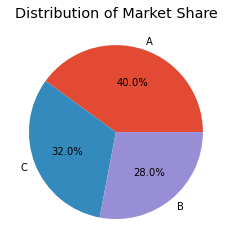

In [161]:
product_counts = df_clean['Supplier'].value_counts()
plt.pie(product_counts.values, labels=product_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Market Share')
plt.show()
# This pie chart helps us visualize the percentage of products sold by each Supplier.We can directly get to know that A holds 
#maximum market share and that B is the smallest player in the market

Text(0.5, 0, 'Sales')

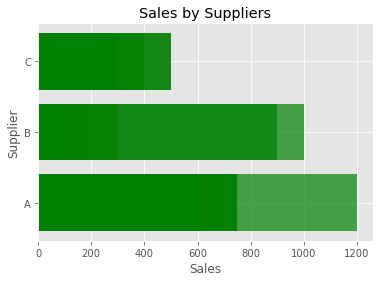

In [132]:
plt.barh(df_clean['Supplier'],df_clean.Sales, color="g", alpha=0.7, align="center")
plt.title('Sales by Suppliers')
plt.ylabel("Supplier")
plt.xlabel("Sales")
#This bar graph shows the sales of each supplier in numbers seeing this graph we get to know that B has a higher volume of sales
#even though it had only 28% market share

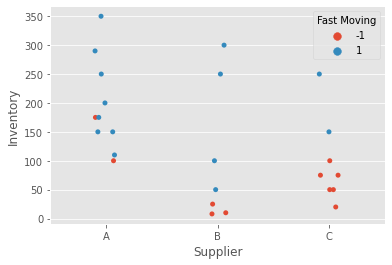

In [160]:
sns.stripplot(data=df_clean, x='Supplier', y='Inventory',hue='Fast Moving')
#This stripplot shows us the categorical distributrion of the data the colours differenciate the demand of each product 

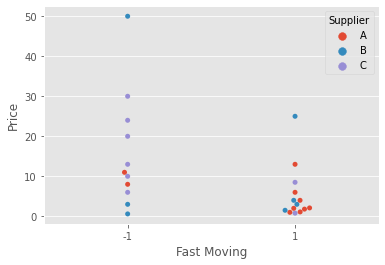

In [139]:
sns.swarmplot(data=df_clean, x='Fast Moving', y='Price',hue='Supplier')
#This swarmplot shows us the numerical distribution of the products based on demand and there respective prices 

Text(0.5, 1.0, 'Price Distribution')

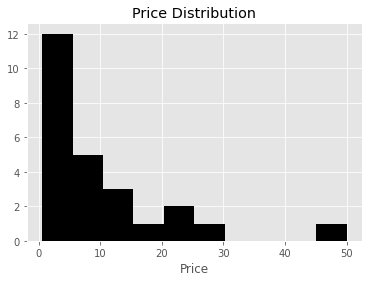

In [140]:
plt.hist(df_clean['Price'], bins=10,color='black')
plt.xlabel('Price')
plt.title('Price Distribution')
#the histogram shows us how the price is distributed in the dataset ,we know that most products are priced in the 1-5$ price range
#and an item is priced at 50$

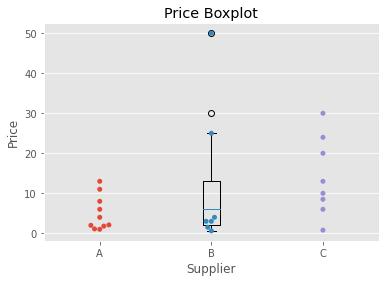

In [141]:
plt.boxplot(df_clean['Price'])
plt.ylabel('Price')
plt.title('Price Boxplot')

sns.swarmplot(data=df_clean, x='Supplier', y='Price')
#The box plot combined with a swarmplot is a deadly combination we can identify the numerical distribution of the data 
#and the range and other components of the five number summary of each supplier

Text(0.5, 1.0, 'Rating Distribution')

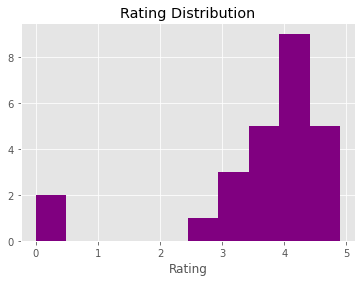

In [142]:
plt.hist(df_clean['Rating'], bins=10,color='purple')
plt.xlabel('Rating')
plt.title('Rating Distribution')
#The histogram shows us the visualization of continous data like ratings .The avg rating values are around 4 and has 2 outliers
#with 0 ratings

Text(0.5, 1.0, 'Rating Boxplot')

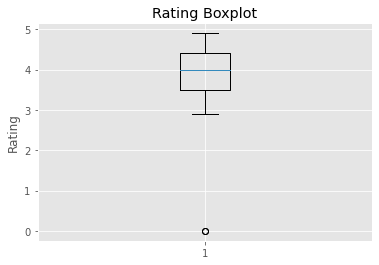

In [143]:
plt.boxplot(df_clean['Rating'])
plt.ylabel('Rating')
plt.title('Rating Boxplot')
# this boxplot gives us a visual estimate of the five number summary of the Rating given to each product
#We find that the median Rating is approximately 4 and there an outlier which can be easily identified since no rating is given

Text(0.5, 1.0, 'Price vs Rating')

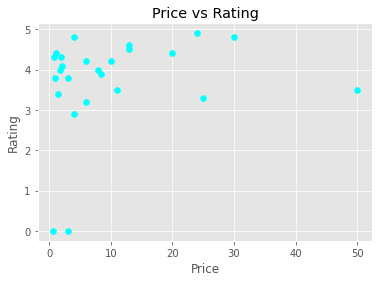

In [144]:
plt.scatter(df_clean['Price'], df_clean['Rating'],color='cyan')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Price vs Rating')
#the shows the relation between price and ratings we can see that there are 2 outliers of prices in the 0-5$ range both having ratings of 0

Text(0.5, 1.0, 'Price vs Sales')

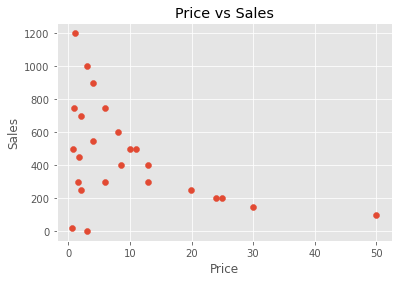

In [145]:
plt.scatter(df_clean['Price'], df_clean['Sales'])
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Price vs Sales')
#The plot is showing the relationship between the variables 'Price' and 'Sales' There is a strong Negative correlation 
#Equating to the number of sales decreasing as the price of the product increases.There are no visible outliers

Text(0.5, 1.0, 'Inventory by Supplier')

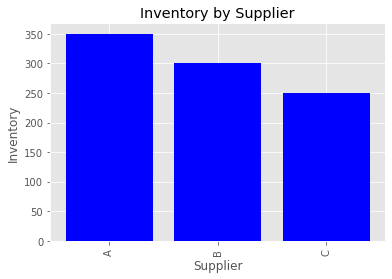

In [146]:
plt.bar(df_clean['Supplier'], df_clean['Inventory'],color='blue')
plt.xticks(rotation=90)
plt.xlabel('Supplier')
plt.ylabel('Inventory')
plt.title('Inventory by Supplier')
#We can visualize the inventory size of each supplier.Supplier A has the highest inventory size while B has the lowest inventory size
#this data can be used to determine which 

Text(0.5, 1.0, 'Price vs Inventory')

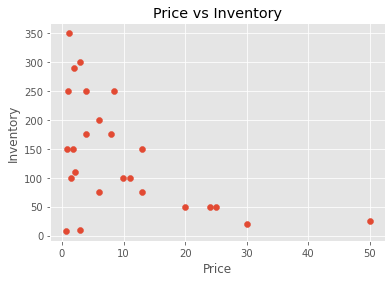

In [147]:
plt.scatter(df_clean['Price'], df_clean['Inventory'])
plt.xlabel('Price')
plt.ylabel('Inventory')
plt.title('Price vs Inventory')
#This plot can be useful in visualizing the relationship between price and inventory, and can help identify patterns or trends in the data. 
#There is a negative correlation between price and inventory, as price increases,size of inventory decreases.


Text(0.5, 1.0, 'Price by Supplier')

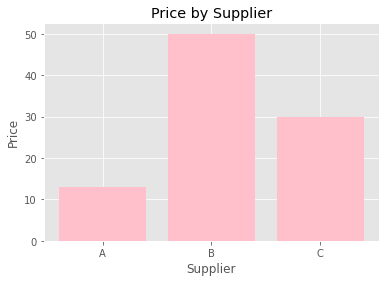

In [162]:
plt.bar(df_clean['Supplier'], df_clean['Price'],color='pink')
plt.xlabel('Supplier')
plt.ylabel('Price')
plt.title('Price by Supplier')
#the bar plot shows the price of products of each suppier 

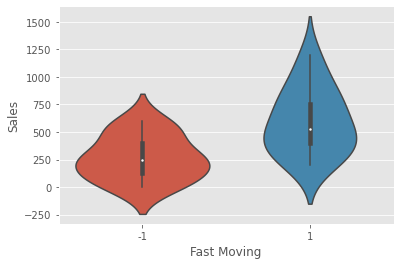

In [149]:
sns.violinplot(x=df_clean['Fast Moving'],y=df_clean['Sales'])
#The following violin plot shows us the distibution of sales with respect to demand of the products the narrower the area
#the lesser the number of sales there is a boxplot in each violin which helps us identify the median,range etc of the sales
#of each product

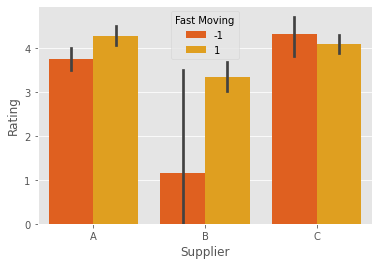

In [150]:
sns.barplot(x='Supplier',y='Rating',data=df_clean,orient='v',hue='Fast Moving',palette='autumn')
#This Bar plot shows us the ratings of the various suppliers we can understand that supplier B has the worst ratings 
#amongst the 3 possibly because of poorer quality of the products.We can also visualize Ratings based on the demand of the product 

Text(0.5, 1.0, 'Sales based on Demand and Supplier')

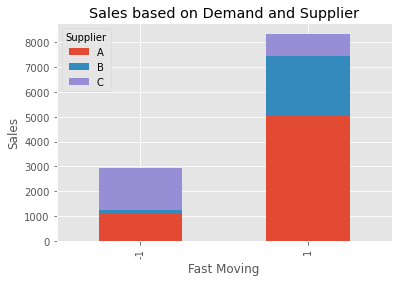

In [151]:
grouped_sales = df_clean.groupby(['Fast Moving', 'Supplier'])['Sales'].sum().unstack()
ax = grouped_sales.plot(kind='bar', stacked=True)


ax.set_xlabel('Fast Moving')
ax.set_ylabel('Sales')
ax.set_title('Sales based on Demand and Supplier')
#the stacked bar graph shows us the division of each supplier and the sales based on demand

Text(33.0, 0.5, 'Supplier')

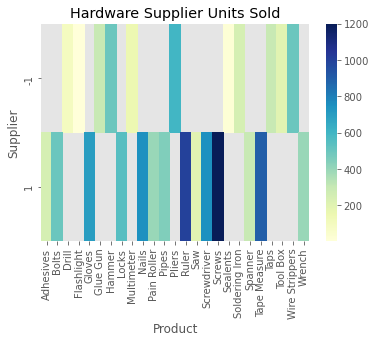

In [158]:
matrix= df_clean.pivot(index='Fast Moving', columns='Product', values='Sales')
sns.heatmap(matrix, cmap='YlGnBu')
plt.title("Hardware Supplier Units Sold")
plt.xlabel("Product")
plt.ylabel("Supplier")
# this heatmap lets us identify where the volume sales are occuring for each product within a glimpse we can identify that
#screws are sold in maximum volume and flashlights are the worst performing product with respect to Sales

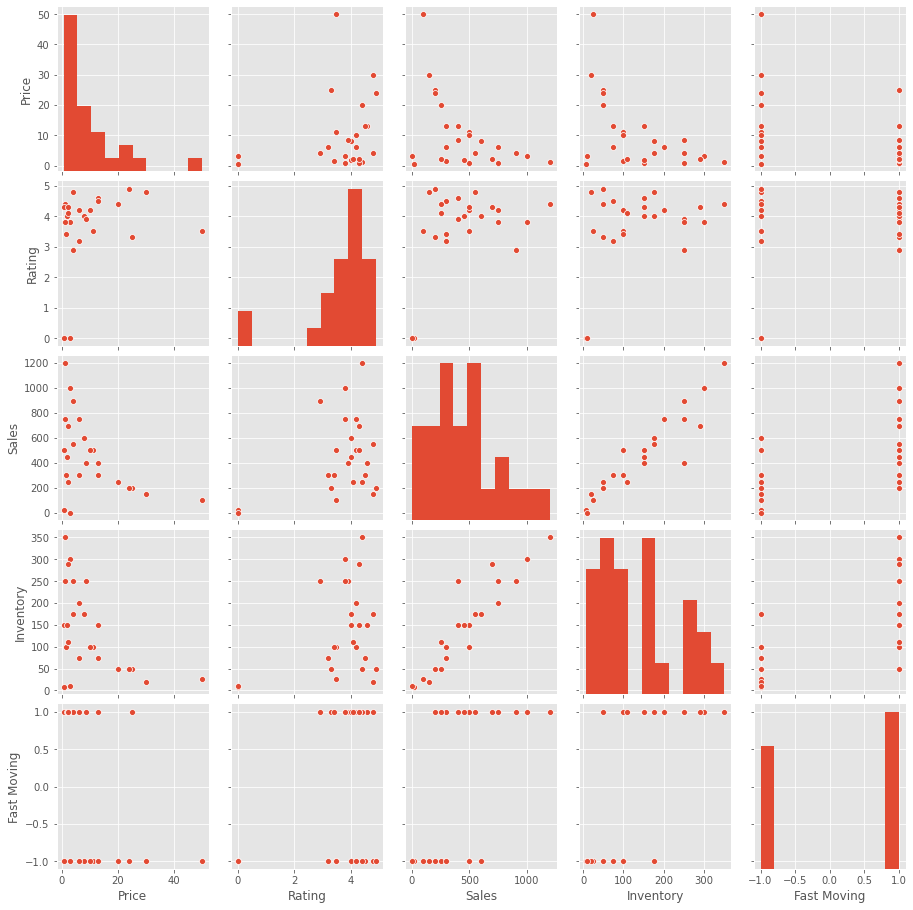

In [152]:
sns.pairplot(df_clean)
#The pairplot shows us the relation between each columns of the datasetThe diagonal plots of the matrix 
#shows us the numeric distribution of each product values